<a href="https://colab.research.google.com/github/maiphuocloi01/Internet-Prices/blob/master/internet_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #data visualization
import seaborn as sns #data visualization
sns.set_style("white")
import plotly.express as px

In [ ]:
internet_data = pd.read_csv("/content/drive/MyDrive/IS402/all_csv sorted.csv")
internet_data.set_index('S.NO', inplace=True)
internet_data.rename(
    columns={
        "Continental region": "Region",
        "NO. OF Internet Plans": "Internet Plans",
        "Average price of 1GB (USD)": "Average Price",
        "Cheapest 1GB for 30 days (USD)": "Lowest Price", 
        "Most expensive 1GB (USD)" : "Highest Price", 
        "Average price of 1GB (USD  at the start of 2021)": "Avg price 2021", 
        "Average price of 1GB (USD – at start of 2020)": "Avg price 2020",
        "Internet users": "Internet Users",
        "Avg \n(Mbit/s)Ookla": "Avg speed"
    }, inplace=True)
internet_data

,Country code,Country,Region,Internet Plans,Average Price,Lowest Price,Highest Price,Avg price 2021,Avg price 2020,Internet Users,Population,Avg speed
S.NO,,,,,,,,,,,,
0,IL,Israel,NEAR EAST,27.0,0.05,0.02,20.95,0.11,0.9,"6,788,737","8,381,516",28.01
1,KG,Kyrgyzstan,CIS (FORMER USSR),20.0,0.15,0.10,7.08,0.21,0.27,"2,309,235","6,304,030",16.30
2,FJ,Fiji,OCEANIA,18.0,0.19,0.05,0.85,0.59,3.57,"452,479","883,483",25.99
3,IT,Italy,WESTERN EUROPE,29.0,0.27,0.09,3.54,0.43,1.73,"50,540,000","60,627,291",37.15
4,SD,Sudan,SUB-SAHARAN AFRICA,33.0,0.27,0.03,0.92,0.63,0.68,"12,512,639","41,801,533",9.50
...,...,...,...,...,...,...,...,...,...,...,...,...
239,VA,Vatican City (Holy See),Europe,NaN,NO PROVIDERS,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240,VE,Venezuela,SOUTH AMERICA,NaN,HYPERINFLATION,NaN,NaN,NaN,NaN,"20,564,451","28,887,118",5.68
241,WF,Wallis and Futuna,OCEANIA,NaN,NO PROVIDERS,NaN,NaN,NaN,NaN,"1,383","11,661",NaN


+ Country - The country name.
+ Country code - unique shortcut of the country name.
+ Region - of the world to which the country belongs.
+ Internet Plans - number of internet services offered for purchase in the country.
+ Averge Price - for 1GB in US dollars.
+ Lowest Price - for 1GB in US dollars.
+ Highest Price - for 1GB in US dollars.
+ Avg price 2021 - average price for 1GB in the start of 2021 in US dollars.
+ Avg price 2020 - average price for 1GB in the start of 2020 in US dollars.
+ Internet Users - number of internet Users in the country.
+ Population - number of people residing in the country.
+ Avg speed - internet speed. Number of MB per second as tested by Ookla.

#Xử lý dữ liệu

In [ ]:
#Bỏ tất cả các quốc gia không có dịch vụ internet hoặc trùng lặp.
internet_data.dropna(subset=['Internet Plans'], inplace=True)
internet_data.drop_duplicates(subset=['Country code'], inplace=True)
internet_data.reset_index(drop=True, inplace=True)
internet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country code    229 non-null    object 
 1   Country         229 non-null    object 
 2   Region          229 non-null    object 
 3   Internet Plans  229 non-null    float64
 4   Average Price   229 non-null    object 
 5   Lowest Price    229 non-null    float64
 6   Highest Price   229 non-null    float64
 7   Avg price 2021  229 non-null    object 
 8   Avg price 2020  229 non-null    object 
 9   Internet Users  203 non-null    object 
 10  Population      201 non-null    object 
 11  Avg speed       136 non-null    float64
dtypes: float64(4), object(8)
memory usage: 21.6+ KB


In [ ]:
internet_data = internet_data.convert_dtypes()
internet_data.dtypes

Country code       string
Country            string
Region             string
Internet Plans      Int64
Average Price      string
Lowest Price      Float64
Highest Price     Float64
Avg price 2021     string
Avg price 2020     string
Internet Users     string
Population         string
Avg speed         Float64
dtype: object

In [ ]:
#Một số thuộc tính là chuỗi chứ không phải số. Tìm xem chúng chứa chuỗi nào.
internet_data[
    (internet_data['Average Price'].str.contains('^[0-9]', regex=True) == False) | 
    (internet_data['Avg price 2020'].str.contains('^[0-9]', regex=True) == False) |
    (internet_data['Avg price 2021'].str.contains('^[0-9]', regex=True) == False)
]

,Country code,Country,Region,Internet Plans,Average Price,Lowest Price,Highest Price,Avg price 2021,Avg price 2020,Internet Users,Population,Avg speed
159,CK,Cook Islands,OCEANIA,9,3.5,1.49,11.42,NO PACKAGES,5.56,<NA>,<NA>,<NA>
193,VU,Vanuatu,OCEANIA,23,6.06,0.75,28.23,4.25,NO PACKAGES,"71,050","292,680",<NA>
194,TV,Tuvalu,OCEANIA,9,6.35,5.72,10.17,NO PACKAGES,12.42,"5,520","11,508",<NA>
202,CU,Cuba,CARIBBEAN,9,7.5,3.2,12.5,13.33,NO PACKAGES,"5,638,956","11,338,134",9.1
218,CC,Cocos (Keeling) Islands,OCEANIA,2,13.47,7.62,19.32,16.98,NO PACKAGES,<NA>,<NA>,<NA>


In [ ]:
internet_data['Avg price 2020'].replace("NO PACKAGES", '0', inplace=True)
internet_data['Avg price 2021'].replace("NO PACKAGES", '0', inplace=True)

In [ ]:
#Xóa dấu phẩy để chuyển đổi Internet Users và Population thành số
internet_data['Internet Users'] = internet_data['Internet Users'].str.replace(',', '')
internet_data['Population'] = internet_data['Population'].str.replace(',', '')
internet_data

,Country code,Country,Region,Internet Plans,Average Price,Lowest Price,Highest Price,Avg price 2021,Avg price 2020,Internet Users,Population,Avg speed
0,IL,Israel,NEAR EAST,27,0.05,0.02,20.95,0.11,0.9,6788737,8381516,28.01
1,KG,Kyrgyzstan,CIS (FORMER USSR),20,0.15,0.1,7.08,0.21,0.27,2309235,6304030,16.3
2,FJ,Fiji,OCEANIA,18,0.19,0.05,0.85,0.59,3.57,452479,883483,25.99
3,IT,Italy,WESTERN EUROPE,29,0.27,0.09,3.54,0.43,1.73,50540000,60627291,37.15
4,SD,Sudan,SUB-SAHARAN AFRICA,33,0.27,0.03,0.92,0.63,0.68,12512639,41801533,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...
224,MW,Malawi,SUB-SAHARAN AFRICA,5,25.46,20.37,25.46,27.41,3.59,2566126,18143217,17.95
225,ST,São Tomé and Príncipe,SUB-SAHARAN AFRICA,16,30.97,13.27,121.65,28.26,5.33,61155,211028,<NA>
226,SH,"Saint Helena, Ascension and Tristan da Cunha",SUB-SAHARAN AFRICA,4,39.87,38.57,51.42,52.5,6.04,2906,6035,<NA>
227,FK,Falkland Islands,SOUTH AMERICA,4,44.56,29.71,82.26,40.41,55.47,2881,3234,<NA>


In [ ]:
#Cast các thuộc tính về đúng kiểu dữ liệu
internet_data.iloc[:, 3:] = internet_data.iloc[:, 3:].astype('float')
internet_data = internet_data.astype({'Internet Plans':'int'})
internet_data.dtypes

Country code       string
Country            string
Region             string
Internet Plans      int64
Average Price     float64
Lowest Price      float64
Highest Price     float64
Avg price 2021    float64
Avg price 2020    float64
Internet Users    float64
Population        float64
Avg speed         float64
dtype: object

In [ ]:
#In chi tiết những mục nào bị null, ví dụ in những quốc gia mà dân số không có
internet_data[internet_data["Population"].isna()] 

,Country code,Country,Region,Internet Plans,Average Price,Lowest Price,Highest Price,Avg price 2021,Avg price 2020,Internet Users,Population,Avg speed
33,RE,Réunion,SUB-SAHARAN AFRICA,11,0.76,0.24,118.20,0.72,1.65,NaN,NaN,NaN
38,YT,Mayotte,SUB-SAHARAN AFRICA,16,0.82,0.25,6.80,1.08,2.22,NaN,NaN,NaN
43,EH,Western Sahara,NORTHERN AFRICA,25,0.88,0.44,5.50,0.99,1.18,NaN,NaN,NaN
46,GP,Guadeloupe,CARIBBEAN,9,0.89,0.49,3.55,2.42,6.06,NaN,NaN,NaN
72,JE,Jersey,WESTERN EUROPE,18,1.32,0.54,17.14,1.71,3.82,38958.0,NaN,NaN
80,GG,Guernsey,WESTERN EUROPE,14,1.46,0.16,54.84,1.24,3.05,NaN,NaN,NaN
87,GF,French Guiana,SOUTH AMERICA,9,1.58,0.82,5.91,3.61,13.41,NaN,NaN,NaN
89,PW,Palau,OCEANIA,6,1.67,1.00,2.50,2.50,8.34,NaN,NaN,NaN
92,PS,Palestine,NEAR EAST,17,1.71,0.46,3.64,3.26,6.56,3208312.0,NaN,4.89
98,IM,Isle of Man,WESTERN EUROPE,14,1.80,0.42,34.28,1.66,3.33,NaN,NaN,NaN


#Phân tích và thống kê dữ liệu

In [ ]:
df = internet_data.copy()
df.columns= df.columns.str.lower().str.replace('.','').str.replace('–','').str.replace('-','').str.replace('  ',' ').str.strip().str.replace(' ','_')
df.columns

<ipython-input-64-c56e5ae8ac55>:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



Index(['country_code', 'country', 'region', 'internet_plans', 'average_price',
       'lowest_price', 'highest_price', 'avg_price_2021', 'avg_price_2020',
       'internet_users', 'population', 'avg_speed'],
      dtype='object')

In [ ]:
df

,country_code,country,region,internet_plans,average_price,lowest_price,highest_price,avg_price_2021,avg_price_2020,internet_users,population,avg_speed
0,IL,Israel,NEAR EAST,27,0.05,0.02,20.95,0.11,0.90,6788737.0,8381516.0,28.01
1,KG,Kyrgyzstan,CIS (FORMER USSR),20,0.15,0.10,7.08,0.21,0.27,2309235.0,6304030.0,16.30
2,FJ,Fiji,OCEANIA,18,0.19,0.05,0.85,0.59,3.57,452479.0,883483.0,25.99
3,IT,Italy,WESTERN EUROPE,29,0.27,0.09,3.54,0.43,1.73,50540000.0,60627291.0,37.15
4,SD,Sudan,SUB-SAHARAN AFRICA,33,0.27,0.03,0.92,0.63,0.68,12512639.0,41801533.0,9.50
...,...,...,...,...,...,...,...,...,...,...,...,...
224,MW,Malawi,SUB-SAHARAN AFRICA,5,25.46,20.37,25.46,27.41,3.59,2566126.0,18143217.0,17.95
225,ST,São Tomé and Príncipe,SUB-SAHARAN AFRICA,16,30.97,13.27,121.65,28.26,5.33,61155.0,211028.0,NaN
226,SH,"Saint Helena, Ascension and Tristan da Cunha",SUB-SAHARAN AFRICA,4,39.87,38.57,51.42,52.50,6.04,2906.0,6035.0,NaN
227,FK,Falkland Islands,SOUTH AMERICA,4,44.56,29.71,82.26,40.41,55.47,2881.0,3234.0,NaN


In [ ]:
#Thêm thuộc tính tỉ lệ người dùng Internet (dựa trên số người dùng internet và dân số của quốc gia đó)
df['internet_users_ratio']= round(df['internet_users']/df['population'], 2)
df.head()

,country_code,country,region,internet_plans,average_price,lowest_price,highest_price,avg_price_2021,avg_price_2020,internet_users,population,avg_speed,internet_users_ratio
0,IL,Israel,NEAR EAST,27,0.05,0.02,20.95,0.11,0.90,6788737.0,8381516.0,28.01,0.81
1,KG,Kyrgyzstan,CIS (FORMER USSR),20,0.15,0.10,7.08,0.21,0.27,2309235.0,6304030.0,16.30,0.37
2,FJ,Fiji,OCEANIA,18,0.19,0.05,0.85,0.59,3.57,452479.0,883483.0,25.99,0.51
3,IT,Italy,WESTERN EUROPE,29,0.27,0.09,3.54,0.43,1.73,50540000.0,60627291.0,37.15,0.83
4,SD,Sudan,SUB-SAHARAN AFRICA,33,0.27,0.03,0.92,0.63,0.68,12512639.0,41801533.0,9.50,0.30


In [ ]:
df['internet_users_ctg']= pd.qcut(df['internet_users_ratio'], q=[0,0.35,0.7,1], labels=['Low Ratio','Intermediate Ratio','High Ratio'])
df.head()

,country_code,country,region,internet_plans,average_price,lowest_price,highest_price,avg_price_2021,avg_price_2020,internet_users,population,avg_speed,internet_users_ratio,internet_users_ctg
0,IL,Israel,NEAR EAST,27,0.05,0.02,20.95,0.11,0.90,6788737.0,8381516.0,28.01,0.81,High Ratio
1,KG,Kyrgyzstan,CIS (FORMER USSR),20,0.15,0.10,7.08,0.21,0.27,2309235.0,6304030.0,16.30,0.37,Low Ratio
2,FJ,Fiji,OCEANIA,18,0.19,0.05,0.85,0.59,3.57,452479.0,883483.0,25.99,0.51,Intermediate Ratio
3,IT,Italy,WESTERN EUROPE,29,0.27,0.09,3.54,0.43,1.73,50540000.0,60627291.0,37.15,0.83,High Ratio
4,SD,Sudan,SUB-SAHARAN AFRICA,33,0.27,0.03,0.92,0.63,0.68,12512639.0,41801533.0,9.50,0.30,Low Ratio


In [ ]:
df.describe(include='all')

,country_code,country,region,internet_plans,average_price,lowest_price,highest_price,avg_price_2021,avg_price_2020,internet_users,population,avg_speed,internet_users_ratio,internet_users_ctg
count,229,229,229,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,2.030000e+02,2.010000e+02,136.000000,201.000000,201
unique,229,229,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,IL,Israel,SUB-SAHARAN AFRICA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low Ratio
freq,1,1,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71
mean,NaN,NaN,NaN,26.703057,3.993057,1.724934,29.545502,5.048428,8.057424,2.429711e+07,3.712091e+07,37.495662,0.586716,NaN
std,NaN,NaN,NaN,16.499044,6.341897,4.784813,59.393293,6.655862,8.881011,9.721372e+07,1.434491e+08,28.206257,0.281244,NaN
min,NaN,NaN,NaN,1.000000,0.050000,0.000000,0.630000,0.000000,0.000000,1.034000e+03,1.620000e+03,4.890000,0.020000,NaN
25%,NaN,NaN,NaN,15.000000,1.080000,0.210000,5.900000,1.360000,2.800000,3.830740e+05,1.136281e+06,17.005000,0.330000,NaN
50%,NaN,NaN,NaN,22.000000,2.180000,0.630000,12.500000,3.200000,5.040000,2.664928e+06,7.051608e+06,28.190000,0.650000,NaN
75%,NaN,NaN,NaN,36.000000,4.200000,1.410000,34.280000,5.320000,10.400000,1.009202e+07,2.506923e+07,49.777500,0.810000,NaN


<ipython-input-69-cf52c948611a>:3: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



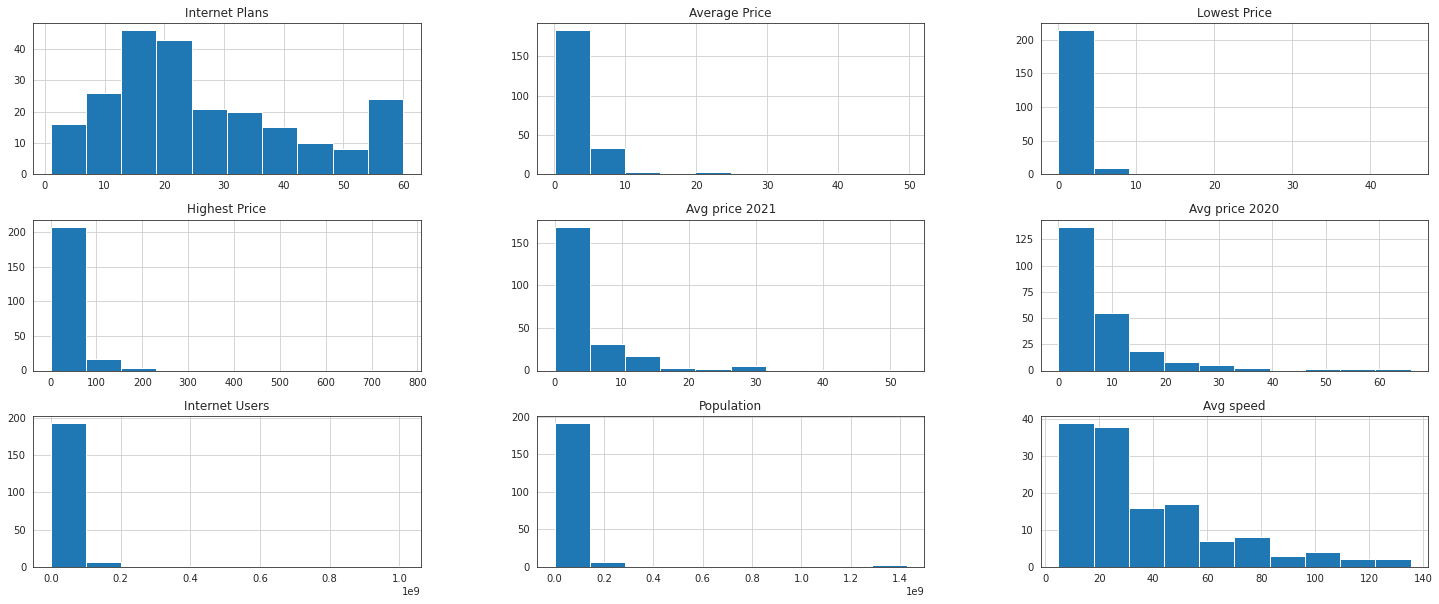

In [ ]:
fig=plt.figure(figsize=(25,10))
ax=fig.gca()
internet_data.hist(ax=ax)
plt.show();

#Loại bỏ dữ liệu ngoại lai 

In [ ]:
df.isnull().sum()

country_code             0
country                  0
region                   0
internet_plans           0
average_price            0
lowest_price             0
highest_price            0
avg_price_2021           0
avg_price_2020           0
internet_users          26
population              28
avg_speed               93
internet_users_ratio    28
internet_users_ctg      28
dtype: int64

In [ ]:
df0 = df[df['population'].notna()]
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 228
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   country_code          201 non-null    string  
 1   country               201 non-null    string  
 2   region                201 non-null    string  
 3   internet_plans        201 non-null    int64   
 4   average_price         201 non-null    float64 
 5   lowest_price          201 non-null    float64 
 6   highest_price         201 non-null    float64 
 7   avg_price_2021        201 non-null    float64 
 8   avg_price_2020        201 non-null    float64 
 9   internet_users        201 non-null    float64 
 10  population            201 non-null    float64 
 11  avg_speed             134 non-null    float64 
 12  internet_users_ratio  201 non-null    float64 
 13  internet_users_ctg    201 non-null    category
dtypes: category(1), float64(9), int64(1), string(3)
memory usa

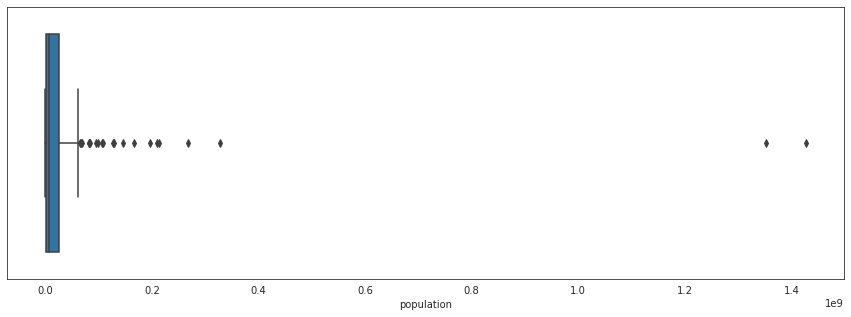

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x='population',data=df0)

plt.show()

In [ ]:
pop_q1 = np.percentile(df0.population, 25)
pop_q2 = np.percentile(df0.population, 50)
pop_q3 = np.percentile(df0.population, 75)
pop_iqr = pop_q3 - pop_q1
pop_min = pop_q1 - 1.5*pop_iqr
pop_max = pop_q3 + 1.5*pop_iqr
print('Min: {} \nQ1: {} \nMedian: {} \nQ3: {} \nMax: {} \nIQR: {}'.format(pop_min, pop_q1, pop_q2, pop_q3, pop_max, pop_iqr ))

Min: -34763142.5 
Q1: 1136281.0 
Median: 7051608.0 
Q3: 25069230.0 
Max: 60968653.5 
IQR: 23932949.0


In [ ]:
df1=df0[(df.population > pop_min) & (df0.population < pop_max)]
df1.shape

<ipython-input-74-54357627ac15>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



(180, 14)

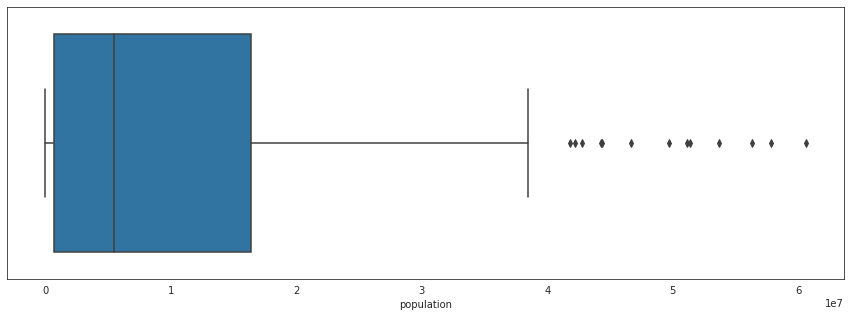

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x='population',data=df1)

plt.show()

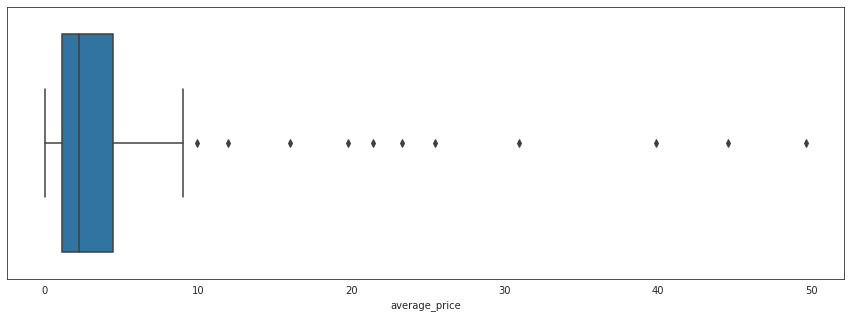

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x='average_price',data=df1)

plt.show()

In [ ]:
avgusr_q1 = np.percentile(df1['average_price'], 25)
avgusr_q2 = np.percentile(df1['average_price'], 50)
avgusr_q3 = np.percentile(df1['average_price'], 75)
avgusr_iqr = avgusr_q3 - avgusr_q1
avgusr_min = avgusr_q1 - 1.5*avgusr_iqr
avgusr_max = avgusr_q3 + 1.5*avgusr_iqr
print('Min: {} \nQ1: {} \nMedian: {} \nQ3: {} \nMax: {} \nIQR: {}'.format(avgusr_min, avgusr_q1, avgusr_q2, avgusr_q3, avgusr_max, avgusr_iqr ))

Min: -3.9025000000000007 
Q1: 1.1375 
Median: 2.28 
Q3: 4.4975000000000005 
Max: 9.537500000000001 
IQR: 3.3600000000000003


In [ ]:
df2=df1[(df1['average_price'] > avgusr_min) & (df1['average_price'] < avgusr_max)]
df2.shape

(169, 14)

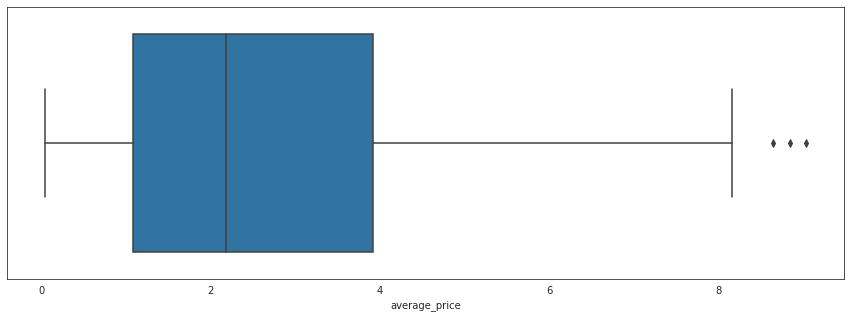

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x='average_price',data=df2)

plt.show()

<ipython-input-80-947d01abfa0e>:3: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



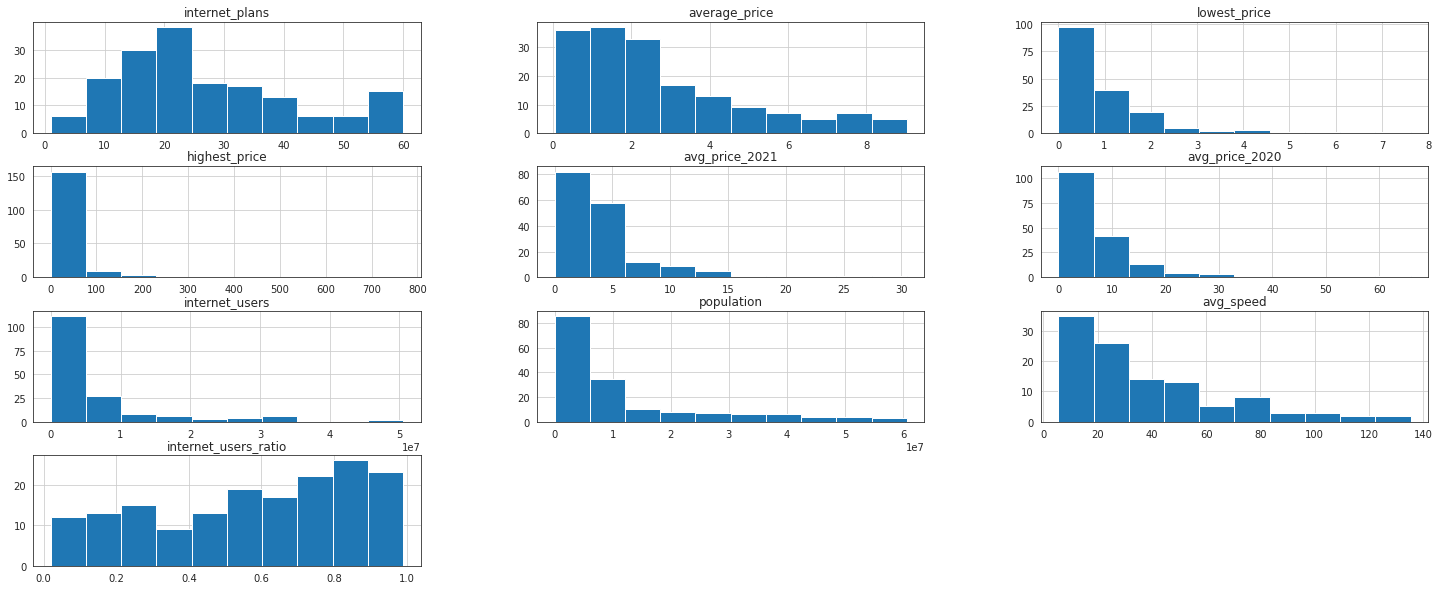

In [ ]:
fig=plt.figure(figsize=(25,10))
ax=fig.gca()
df2.hist(ax=ax)
plt.show();

In [ ]:
df_outlier=df[~df.country.isin(df2.country)]
df_outlier.head()

,country_code,country,region,internet_plans,average_price,lowest_price,highest_price,avg_price_2021,avg_price_2020,internet_users,population,avg_speed,internet_users_ratio,internet_users_ctg
5,RU,Russia,CIS (FORMER USSR),22,0.29,0.13,1.86,0.52,0.91,124000000.0,145734038.0,20.46,0.85,High Ratio
7,BD,Bangladesh,ASIA (EX. NEAR EAST),60,0.34,0.11,2.22,0.70,0.99,129180000.0,166303498.0,10.43,0.78,Intermediate Ratio
10,FR,France,WESTERN EUROPE,45,0.41,0.09,118.20,0.81,1.21,59470000.0,64990511.0,60.94,0.92,High Ratio
11,ID,Indonesia,ASIA (EX. NEAR EAST),53,0.42,0.17,2.94,0.64,2.99,196000000.0,267670543.0,17.70,0.73,Intermediate Ratio
14,VN,Vietnam,ASIA (EX. NEAR EAST),46,0.49,0.07,5.55,0.57,1.31,68172134.0,95545962.0,33.90,0.71,Intermediate Ratio


In [ ]:
df_outlier.describe(include='all')

,country_code,country,region,internet_plans,average_price,lowest_price,highest_price,avg_price_2021,avg_price_2020,internet_users,population,avg_speed,internet_users_ratio,internet_users_ctg
count,60,60,60,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,3.400000e+01,3.200000e+01,25.000000,32.000000,32
unique,60,60,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,RU,Russia,ASIA (EX. NEAR EAST),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Intermediate Ratio
freq,1,1,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
mean,NaN,NaN,NaN,25.783333,7.403167,3.983833,30.719333,7.571333,10.033000,1.137134e+08,1.715870e+08,31.052400,0.634375,NaN
std,NaN,NaN,NaN,19.278592,11.213724,8.831147,35.141318,10.570284,11.224688,2.178907e+08,3.307581e+08,19.248171,0.288600,NaN
min,NaN,NaN,NaN,2.000000,0.290000,0.020000,1.210000,0.000000,0.000000,2.881000e+03,3.234000e+03,4.890000,0.060000,NaN
25%,NaN,NaN,NaN,11.000000,1.010000,0.247500,5.537500,1.087500,2.647500,1.032273e+06,1.307102e+07,17.950000,0.432500,NaN
50%,NaN,NaN,NaN,18.000000,2.255000,0.795000,15.155000,2.935000,6.310000,6.223551e+07,8.273225e+07,22.300000,0.710000,NaN
75%,NaN,NaN,NaN,41.250000,8.385000,2.457500,42.400000,10.640000,13.080000,1.184500e+08,1.508764e+08,44.050000,0.860000,NaN


#Trực quan hóa dữ liệu

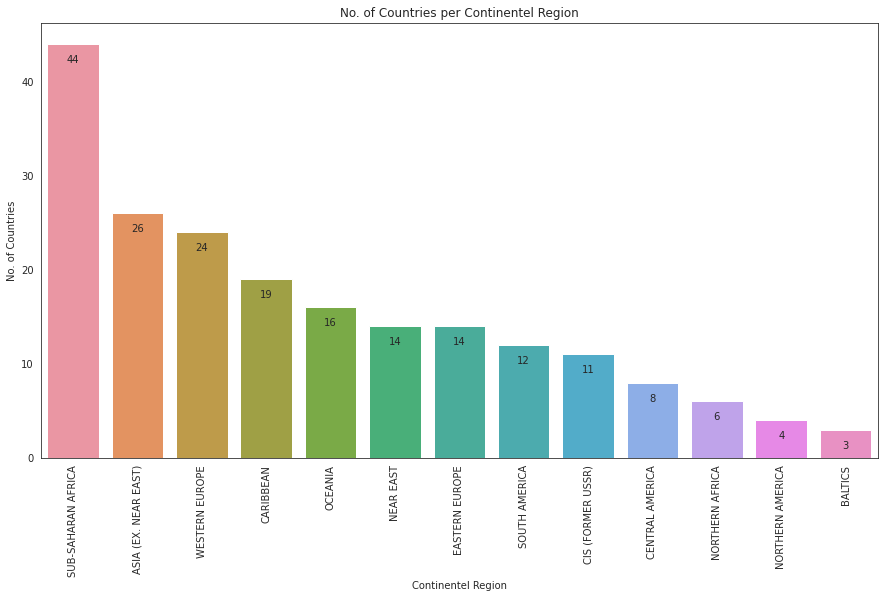

In [ ]:
#Vẽ biểu đồ thống kê số quốc gia trên mỗi khu vực lục địa
plt.figure(figsize=(15,8))
sns.countplot(x= df0.region, order= df0.region.value_counts().index)

for i in range(len(df.region.value_counts())):
    plt.text(i,df0.region.value_counts()[i]-2, df0.region.value_counts()[i], ha='center')

plt.title('No. of Countries per Continentel Region')
plt.xlabel('Continentel Region')
plt.ylabel('No. of Countries')
plt.xticks(rotation=90)
plt.show()

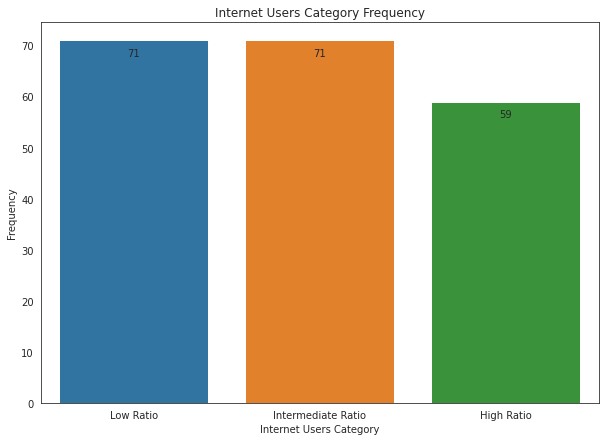

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x= df0.internet_users_ctg, order= df0.internet_users_ctg.value_counts().index)

for i in range(len(df0.internet_users_ctg.value_counts())):
    plt.text(i,df0.internet_users_ctg.value_counts()[i]-3, df0.internet_users_ctg.value_counts()[i], ha='center')


plt.title('Internet Users Category Frequency')
plt.xlabel('Internet Users Category')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df_avg_contreg= df2.groupby(['region']).mean()
df_avg_contreg.reset_index(inplace=True)
df_avg_contreg.head()

,region,internet_plans,average_price,lowest_price,highest_price,avg_price_2021,avg_price_2020,internet_users,population,avg_speed,internet_users_ratio
0,ASIA (EX. NEAR EAST),34.437500,1.878125,0.434375,18.388125,2.678125,4.568750,1.007459e+07,1.807554e+07,39.126429,0.552500
1,BALTICS,26.333333,2.086667,0.243333,35.850000,2.303333,7.950000,1.660902e+06,2.017548e+06,48.933333,0.830000
2,CARIBBEAN,15.500000,3.496667,1.498889,24.232778,6.348889,7.511667,2.002991e+06,3.274049e+06,33.800000,0.675000
3,CENTRAL AMERICA,21.571429,2.227143,1.082857,11.814286,3.018571,13.411429,3.501842e+06,7.040143e+06,18.641667,0.471429
4,CIS (FORMER USSR),26.333333,1.055556,0.238889,14.400000,1.316667,3.442222,9.586243e+06,1.520041e+07,18.224444,0.626667


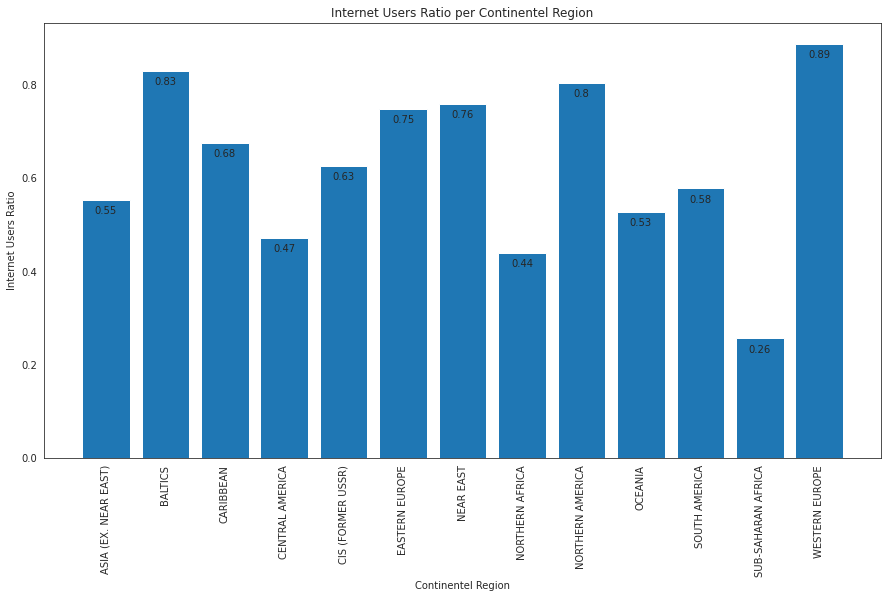

In [ ]:
plt.figure(figsize=(15,8))
plt.bar(x= 'region', height= 'internet_users_ratio', data=df_avg_contreg)

for i in range(len(df_avg_contreg.region)):
    plt.text(i, df_avg_contreg.internet_users_ratio[i]-0.03, round(df_avg_contreg.internet_users_ratio[i],2), ha='center')

plt.title('Internet Users Ratio per Continentel Region')
plt.xlabel('Continentel Region')
plt.ylabel('Internet Users Ratio')
plt.xticks(rotation=90)
plt.show()

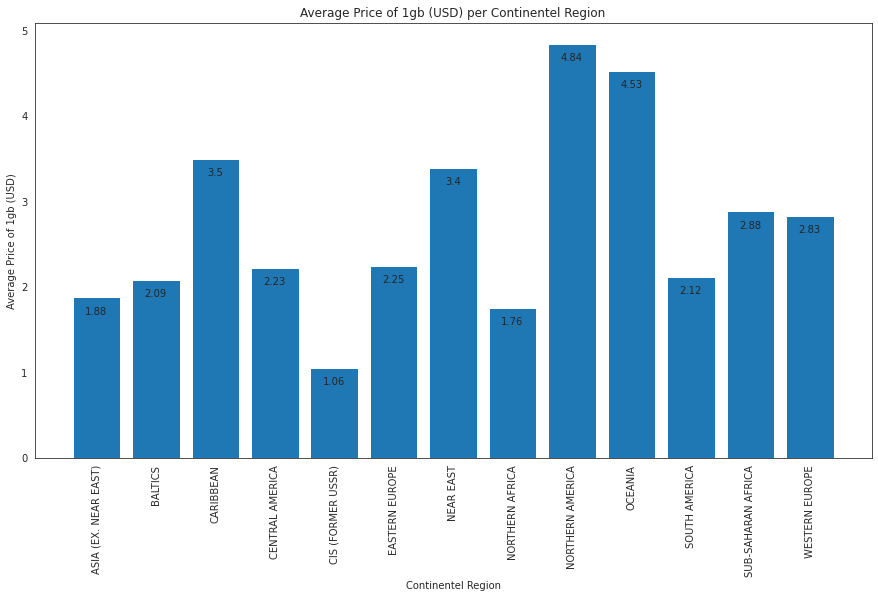

In [ ]:
plt.figure(figsize=(15,8))
plt.bar(x= 'region', height= 'average_price', data=df_avg_contreg)

for i in range(len(df_avg_contreg.region)):
    plt.text(i, df_avg_contreg['average_price'][i]-0.2, round(df_avg_contreg['average_price'][i],2), ha='center')

plt.title('Average Price of 1gb (USD) per Continentel Region')
plt.xlabel('Continentel Region')
plt.ylabel('Average Price of 1gb (USD)')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_avg_intusr= df2.groupby(['internet_users_ctg']).mean()
df_avg_intusr.reset_index(inplace=True)
df_avg_intusr

,internet_users_ctg,internet_plans,average_price,lowest_price,highest_price,avg_price_2021,avg_price_2020,internet_users,population,avg_speed,internet_users_ratio
0,Low Ratio,27.435484,2.845161,1.046613,20.399194,4.360484,7.970000,3.164950e+06,1.286040e+07,18.051935,0.259839
1,Intermediate Ratio,25.344828,2.383448,0.824828,34.132931,3.810345,6.863276,7.480850e+06,1.173888e+07,31.157955,0.656897
2,High Ratio,28.510204,3.175102,0.882653,34.251020,4.295102,7.162449,8.896797e+06,1.004737e+07,66.459444,0.886122


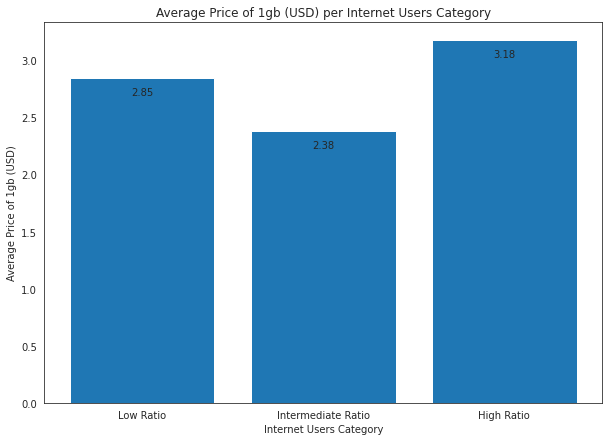

In [ ]:
plt.figure(figsize=(10,7))
plt.bar(x= 'internet_users_ctg', height= 'average_price', data=df_avg_intusr)

for i in range(len(df_avg_intusr.internet_users_ctg)):
    plt.text(i, df_avg_intusr['average_price'][i]-0.15, round(df_avg_intusr['average_price'][i], 2), ha='center')

plt.title('Average Price of 1gb (USD) per Internet Users Category')
plt.xlabel('Internet Users Category')
plt.ylabel('Average Price of 1gb (USD)')
plt.show()

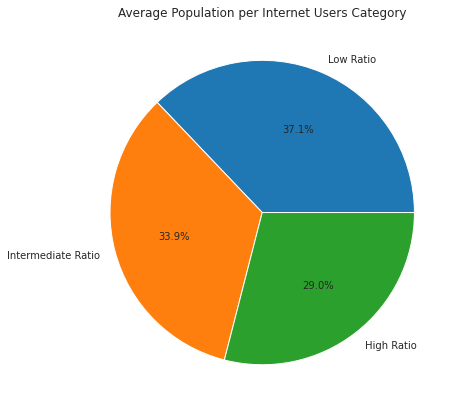

In [ ]:
plt.figure(figsize=(10,7))

plt.pie(df_avg_intusr.population, labels=df_avg_intusr.internet_users_ctg, autopct='%1.1f%%')
plt.title('Average Population per Internet Users Category')


plt.show();

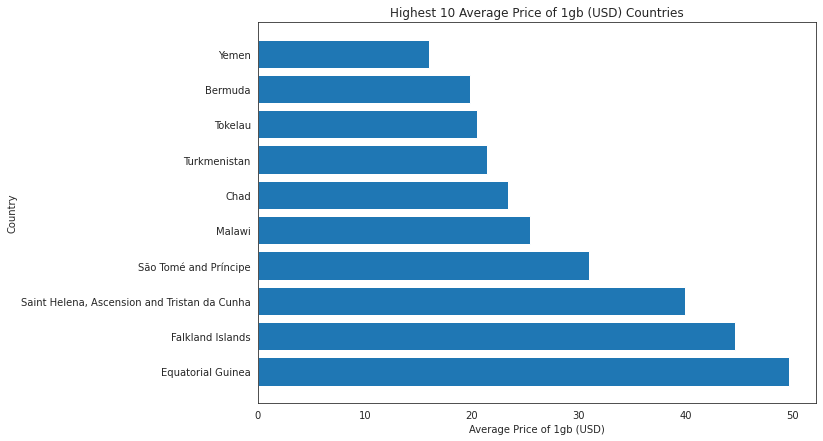

In [ ]:
plt.figure(figsize=(10,7))
df_srt= df.sort_values('average_price', ascending=False).round(2)
plt.barh(y=df_srt['country'].head(10), width= df_srt['average_price'].head(10))

plt.title('Highest 10 Average Price of 1gb (USD) Countries')
plt.xlabel('Average Price of 1gb (USD)')
plt.ylabel('Country')
plt.show()

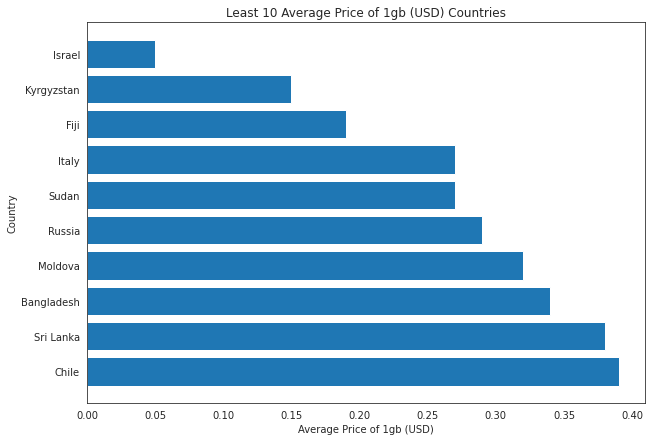

In [ ]:
plt.figure(figsize=(10,7))
plt.barh(y=df_srt['country'].tail(10), width= df_srt['average_price'].tail(10))

plt.title('Least 10 Average Price of 1gb (USD) Countries')
plt.xlabel('Average Price of 1gb (USD)')
plt.ylabel('Country')
plt.show()

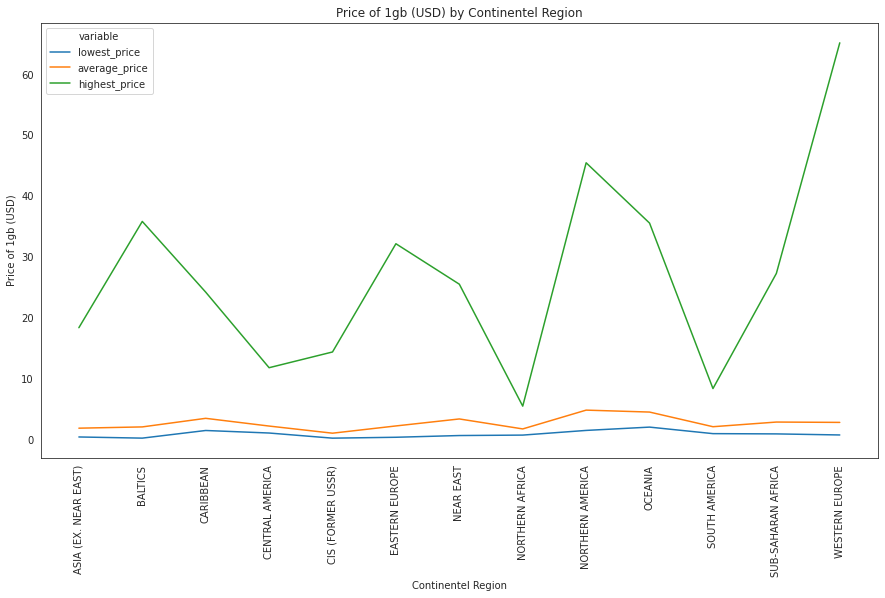

In [ ]:
min_avg_max=['lowest_price','average_price','highest_price']

plt.figure(figsize=(15,8))
sns.lineplot(data= df_avg_contreg.melt('region', value_vars= min_avg_max), x='region', y='value', hue='variable', ci=None)

plt.title('Price of 1gb (USD) by Continentel Region')
plt.xlabel('Continentel Region')
plt.ylabel('Price of 1gb (USD)')
plt.xticks(rotation=90)
plt.show()

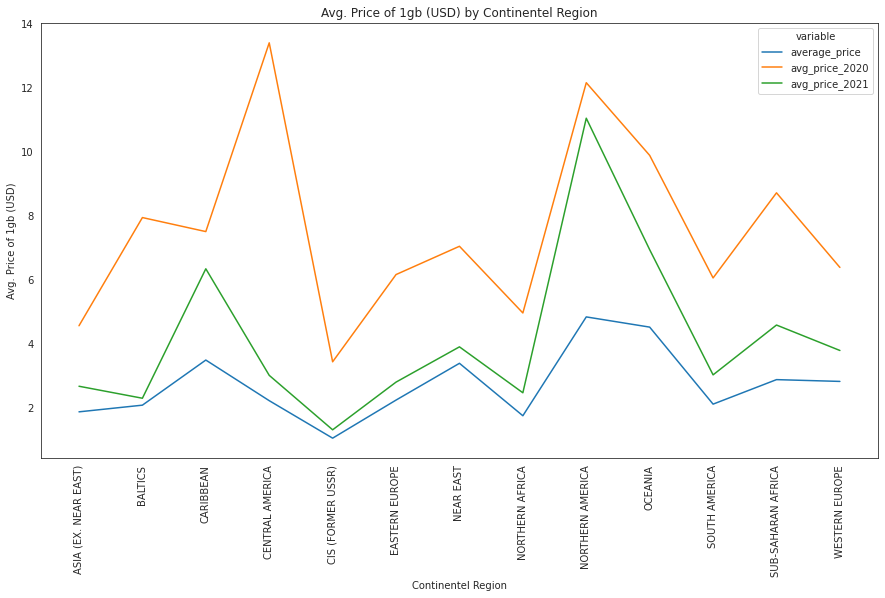

In [ ]:
avg_years=['average_price','avg_price_2020','avg_price_2021']

plt.figure(figsize=(15,8))
sns.lineplot(data= df_avg_contreg.melt('region', value_vars= avg_years), x='region', y='value', hue='variable', ci=None)

plt.title('Avg. Price of 1gb (USD) by Continentel Region')
plt.xlabel('Continentel Region')
plt.ylabel('Avg. Price of 1gb (USD)')
plt.xticks(rotation=90)
plt.show()
#Nhận xét
#Giá gói cước Internet 2021 giảm đi đáng kể so với năm 2020.
#Điều này đúng thực tế là vào năm 2020, Đại dịch COVID-19 dịch đã bùng phát và nhu cầu về internet tăng lên đáng kể.

In [ ]:
df2.corr()

,internet_plans,average_price,lowest_price,highest_price,avg_price_2021,avg_price_2020,internet_users,population,avg_speed,internet_users_ratio
internet_plans,1.000000,-0.244795,-0.389372,-0.026015,-0.216025,-0.126635,0.432325,0.495077,-0.006683,-0.012010
average_price,-0.244795,1.000000,0.660994,0.332753,0.615983,0.303739,-0.192057,-0.269343,0.366648,0.030599
lowest_price,-0.389372,0.660994,1.000000,0.054497,0.500437,0.248956,-0.296372,-0.329927,0.137540,-0.065002
highest_price,-0.026015,0.332753,0.054497,1.000000,0.225174,0.031776,0.007544,-0.043224,0.152673,0.103593
avg_price_2021,-0.216025,0.615983,0.500437,0.225174,1.000000,0.387606,-0.148859,-0.203371,0.275149,-0.006813
avg_price_2020,-0.126635,0.303739,0.248956,0.031776,0.387606,1.000000,-0.170011,-0.174280,0.146943,-0.075251
internet_users,0.432325,-0.192057,-0.296372,0.007544,-0.148859,-0.170011,1.000000,0.855035,0.062513,0.251891
population,0.495077,-0.269343,-0.329927,-0.043224,-0.203371,-0.174280,0.855035,1.000000,-0.201078,-0.106228
avg_speed,-0.006683,0.366648,0.137540,0.152673,0.275149,0.146943,0.062513,-0.201078,1.000000,0.650481
internet_users_ratio,-0.012010,0.030599,-0.065002,0.103593,-0.006813,-0.075251,0.251891,-0.106228,0.650481,1.000000


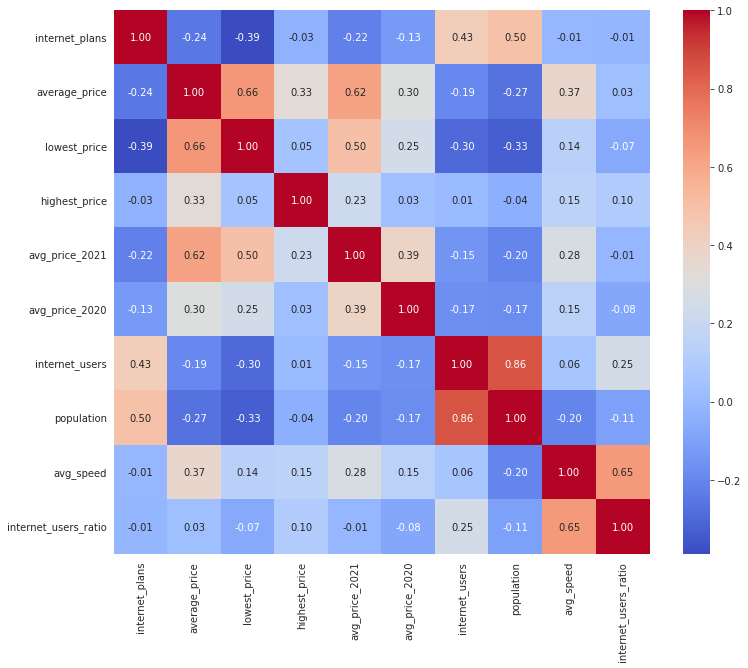

In [ ]:
#Kiểm tra mối tương quan giữa tất cả các feature khác nhau trong dữ liệu để tìm mối quan hệ giữa chúng.
plt.figure(figsize=(12,10))
dataplot = sns.heatmap(df2.corr(), cmap="coolwarm", annot=True, fmt='.2f')

plt.show()
#Trong bản đồ nhiệt ở dưới cho chúng ta thấy rằng có mối tương quan giữa tốc độ internet, tỷ lệ sử dụng internet

In [ ]:
internet_df_outliers = df0.loc[
    (df0['internet_users'] < 7*10**7) & 
    (df0['lowest_price'] < 5)
]

In [ ]:
corrs = df0.corr(method = 'spearman')
def spearman_cor(f1, f2):
    corr = round(df0[f1].corr(df0[f2], 'spearman'), 3)
    return f"Spearman: {corr}"

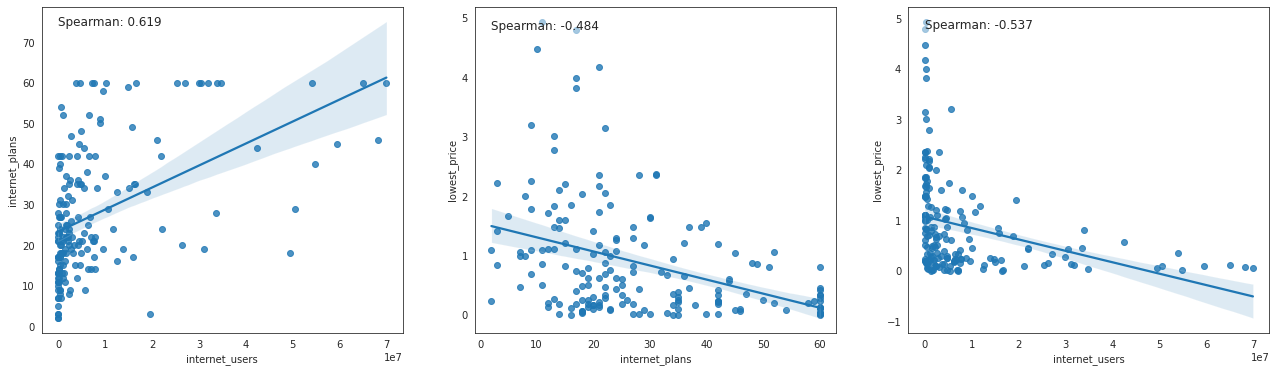

In [ ]:
fig, axes = plt.subplots(figsize=(22, 6), ncols=3)
sns.regplot(ax=axes[0], x='internet_users', y='internet_plans', data=internet_df_outliers);
sns.regplot(ax=axes[1], x='internet_plans', y='lowest_price', data=internet_df_outliers);
sns.regplot(ax=axes[2], x='internet_users', y='lowest_price', data=internet_df_outliers);

props = dict(boxstyle='round', facecolor='white', alpha=0.5)
axes[0].text(0.2, 74, spearman_cor('internet_users', 'internet_plans'), fontsize=12, bbox=props)
axes[1].text(2, 4.8, spearman_cor('internet_plans', 'lowest_price'), fontsize=12, bbox=props)
axes[2].text(0.2, 4.8, spearman_cor('internet_users', 'lowest_price'), fontsize=12, bbox=props)
plt.show()
#Nhận xét
#Có mối tương quan tích cực mạnh mẽ giữa giữa số lượng người dùng internet, số lượng dịch vụ internet và giá internet.
#Hãy xem xét từng mối quan hệ một cách riêng biệt. Chúng ta sẽ bỏ đi một số các dữ liệu ngoại lai để có được một con số rõ ràng hơn.
#=====================================
# => Có một mối tương quan yếu giữa số lượng người dùng Internet cao, số lượng dịch vụ Internet cao và giá Internet thấp. Quan sát này phù hợp với hiểu biết của chúng ta về một nền kinh tế cạnh tranh. Càng nhiều dịch vụ thì giá càng giảm.

In [ ]:
fig = px.choropleth(df0, locations='country', locationmode='country names',color='internet_users_ratio', color_continuous_scale= 'Viridis_r')
fig.show()

In [ ]:
fig = px.choropleth(df0, locations='country', locationmode='country names',color='average_price', color_continuous_scale= 'Viridis_r')
fig.show()

In [ ]:
fig = px.choropleth(df0, locations='country', locationmode='country names',color='internet_plans', color_continuous_scale= 'Viridis_r')
fig.show()

#Thuật toán k-Means Clustering

In [ ]:
internet_data.info()
dt = internet_data.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country code    229 non-null    string 
 1   Country         229 non-null    string 
 2   Region          229 non-null    string 
 3   Internet Plans  229 non-null    int64  
 4   Average Price   229 non-null    float64
 5   Lowest Price    229 non-null    float64
 6   Highest Price   229 non-null    float64
 7   Avg price 2021  229 non-null    float64
 8   Avg price 2020  229 non-null    float64
 9   Internet Users  203 non-null    float64
 10  Population      201 non-null    float64
 11  Avg speed       136 non-null    float64
dtypes: float64(8), int64(1), string(3)
memory usage: 21.6 KB


In [ ]:
dt.drop('Country code',axis = 1,inplace = True) 
dt.drop('Avg speed',axis = 1,inplace = True)
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         229 non-null    string 
 1   Region          229 non-null    string 
 2   Internet Plans  229 non-null    int64  
 3   Average Price   229 non-null    float64
 4   Lowest Price    229 non-null    float64
 5   Highest Price   229 non-null    float64
 6   Avg price 2021  229 non-null    float64
 7   Avg price 2020  229 non-null    float64
 8   Internet Users  203 non-null    float64
 9   Population      201 non-null    float64
dtypes: float64(7), int64(1), string(2)
memory usage: 18.0 KB


In [ ]:
dt = dt[dt['Population'].notna()]
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 228
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         201 non-null    string 
 1   Region          201 non-null    string 
 2   Internet Plans  201 non-null    int64  
 3   Average Price   201 non-null    float64
 4   Lowest Price    201 non-null    float64
 5   Highest Price   201 non-null    float64
 6   Avg price 2021  201 non-null    float64
 7   Avg price 2020  201 non-null    float64
 8   Internet Users  201 non-null    float64
 9   Population      201 non-null    float64
dtypes: float64(7), int64(1), string(2)
memory usage: 17.3 KB


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = dt.iloc[:,2:]

sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-0.07873977, -0.5943649 , -0.33001708, ..., -0.77436438,
        -0.18202028, -0.20084577],
       [-0.49838696, -0.57907856, -0.31382931, ..., -0.8440874 ,
        -0.22799756, -0.21536432],
       [-0.61828616, -0.57296403, -0.32394667, ..., -0.47887157,
        -0.24705516, -0.25324591],
       ...,
       [-1.45758055,  5.49265634,  7.47046446, ..., -0.20551305,
        -0.25166955, -0.25937797],
       [-1.45758055,  6.20958576,  5.67766896, ...,  5.26497741,
        -0.2516698 , -0.25939754],
       [-1.45758055,  6.99071782,  8.80393199, ...,  4.37075198,
        -0.24828516, -0.25027235]])

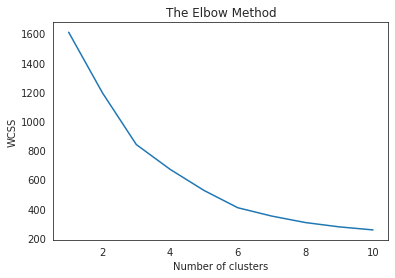

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(
        n_clusters=2, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
kmeans.fit(X)
clusters=pd.DataFrame(X,columns=dt.columns[2:])
clusters['label']=kmeans.labels_
polar=clusters.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])
fig4 = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=800,width=1000)
fig4.show()

In [ ]:
kmeans = KMeans(
        n_clusters=3, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
kmeans.fit(X)
clusters=pd.DataFrame(X,columns=dt.columns[2:])
clusters['label']=kmeans.labels_
polar=clusters.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])
fig4 = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=800,width=1000)
fig4.show()